In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Technocolab/bank_data.csv")

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
data.recovery_strategy.value_counts()

Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64

In [6]:
data.duplicated().sum()

0

## Exploratory Data Analysis

We will conduct some Exploratory Data Analysis (EDA) to gain deeper insights and form a better understanding of the data. This will guide our future analysis and decision-making process.

In [7]:
# data.info()
data['expected_recovery_amount'].value_counts()

1386    5
1481    4
1634    4
1168    4
1120    4
       ..
1893    1
1886    1
1879    1
1878    1
9964    1
Name: expected_recovery_amount, Length: 1529, dtype: int64

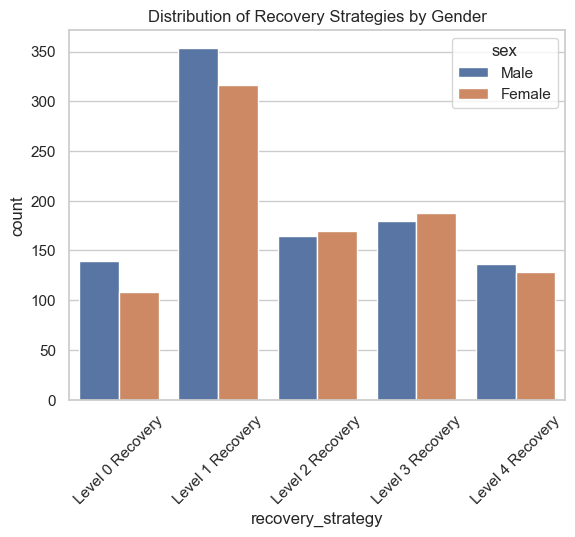

In [8]:
# Creating a Countplot of "recovery strategy" categorized by gender.
sns.set(style="whitegrid")
sns.countplot(data= data, x= 'recovery_strategy', hue= 'sex')
plt.title('Distribution of Recovery Strategies by Gender')
plt.xticks(rotation= 45)
plt.show()

There is an almost equal proportion of male and female defaulters across all recovery levels, with males constituting a larger portion of the defaulting population.

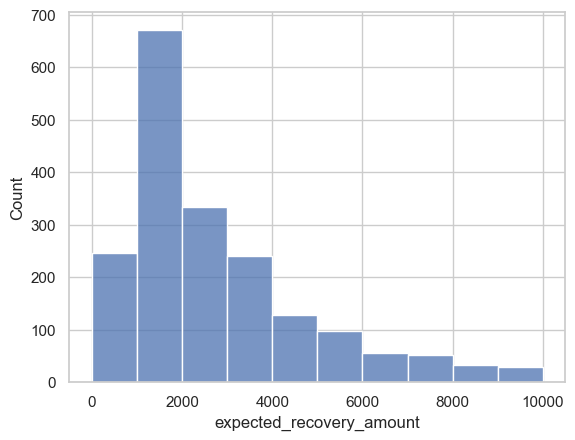

In [9]:
# Creating a histplot of "Expected_recovery_amount"
sns.set(style="whitegrid")
# sns.displot(data['expected_recovery_amount'])
sns.histplot(data['expected_recovery_amount'], bins=range(0, max(data['expected_recovery_amount']) + 1000, 1000))
plt.show()

The majority of defaulters, nearly 700 of them, fall under level one recovery, followed by level three recovery defaulters.

## Statistical test: Age vs. Expected Recovery Amount
We aim to ensure that variables like age and sex exhibit similar characteristics both above and below the $1000 Expected Recovery Amount threshold. This is crucial, as we need to establish that any disparities in the actual recovery amount are attributed to the higher Recovery Strategy and not influenced by factors such as age or sex.

Upon inspecting the scatter plot of age against Expected Recovery Amount, there was no evident discontinuity observed around 1000 dollars. To delve deeper, we will conduct a statistical analysis to compare the average age of customers just above and below this threshold. Our investigation will begin within the range of 900 to 1100 dollars.

To assess potential differences in ages around the threshold, we will employ the Kruskal-Wallis test. This statistical test is advantageous for not making any specific assumptions about the distribution of data.

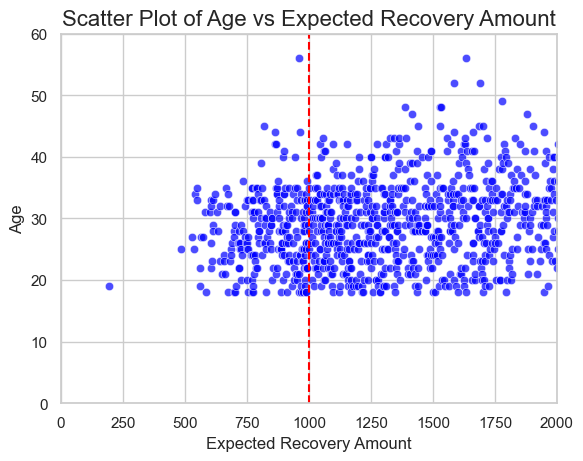

In [10]:
# Creating a scatterplot for Age Vs. Expected Recovery Amount
sns.scatterplot(x= data['expected_recovery_amount'], y = data['age'], marker = 'o', alpha = 0.7, color = 'blue')
plt.axvline(x= 1000, color ='red', linestyle = '--', label = 'Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs Expected Recovery Amount', fontsize=16)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.show()

In [11]:
# Computing the statistics of level 0 and level 1 recovery strategy for age column just above and below the threshold.
exp_rec_amt_900_1100 = data.loc[(data['expected_recovery_amount'] <1100) & (data['expected_recovery_amount'] >=900)]
exp_rec_amt_900_1100.groupby('recovery_strategy')['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     89.000000
       Level 1 Recovery     94.000000
mean   Level 0 Recovery     27.224719
       Level 1 Recovery     28.755319
std    Level 0 Recovery      6.399135
       Level 1 Recovery      5.859807
min    Level 0 Recovery     18.000000
       Level 1 Recovery     18.000000
25%    Level 0 Recovery     23.000000
       Level 1 Recovery     24.000000
50%    Level 0 Recovery     26.000000
       Level 1 Recovery     29.000000
75%    Level 0 Recovery     31.000000
       Level 1 Recovery     33.000000
max    Level 0 Recovery     56.000000
       Level 1 Recovery     43.000000
dtype: float64

In [12]:
# Computing the statistics for recovery strategy of whole dataset
data.groupby('recovery_strategy')['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     247.000000
       Level 1 Recovery     670.000000
       Level 2 Recovery     333.000000
       Level 3 Recovery     368.000000
       Level 4 Recovery     264.000000
mean   Level 0 Recovery      27.627530
       Level 1 Recovery      29.773134
       Level 2 Recovery      36.828829
       Level 3 Recovery      50.445652
       Level 4 Recovery      64.477273
std    Level 0 Recovery       5.975469
       Level 1 Recovery       6.904594
       Level 2 Recovery       9.371072
       Level 3 Recovery      10.802022
       Level 4 Recovery      10.168516
min    Level 0 Recovery      18.000000
       Level 1 Recovery      18.000000
       Level 2 Recovery      18.000000
       Level 3 Recovery      23.000000
       Level 4 Recovery      33.000000
25%    Level 0 Recovery      23.000000
       Level 1 Recovery      24.000000
       Level 2 Recovery      30.000000
       Level 3 Recovery      42.750000
       Level 4 Recovery      56.000000


In the early stages of the recovery strategies (Level 0 and Level 1), it's evident that a substantial majority, around 75%, of the population is under 32 years old.

In [13]:
from scipy import stats
age_level_0 = exp_rec_amt_900_1100.loc[data['recovery_strategy'] == 'Level 0 Recovery']['age']
age_level_1 = exp_rec_amt_900_1100.loc[data['recovery_strategy'] == 'Level 1 Recovery']['age']
stats.kruskal(age_level_0, age_level_1)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

Since our p-value (0.063) is slightly higher than 0.05, we do not have enough evidence to reject the null hypothesis at the 0.05 significance level.This means that we do not have sufficient evidence to conclude that there are significant differences between the groups based on the Kruskal-Wallis test.

## Statistical test: sex vs. expected recovery amount
We have observed that there is no significant change in the average customer age just above and just below the one-thousand-dollar threshold. This assessment was made through both a statistical test and a visual examination using a scatter plot.

Next, we aim to verify that the proportion of male customers remains consistent across the $1000 threshold. We will initially focus on the range from nine hundred to eleven hundred dollars and may adjust this range as needed.

To address this question analytically, we will construct cross-tabulations and perform chi-square tests comparing the percentage of male to female customers.

In [14]:
crosstab = pd.crosstab(data.loc[(data['expected_recovery_amount'] <1100) & 
                    (data['expected_recovery_amount']>=900)]['recovery_strategy'], data['sex'])
print(crosstab)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print('-'*20)
print(p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
--------------------
0.5377947810444592


In [15]:
exp_rec_amt_900_1100_male = data.loc[(data['expected_recovery_amount'] <1100) & (data['expected_recovery_amount'] >=900) 
         & (data['sex'] == 'Male')]

In [16]:
print(exp_rec_amt_900_1100_male.head(5))
print('-'*20)
print(exp_rec_amt_900_1100_male.shape)

       id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
158   520                       900                 504.790  Level 0 Recovery   
160  1383                       900                 554.745  Level 0 Recovery   
161   998                       901                 887.005  Level 0 Recovery   
162  1351                       903                 667.035  Level 0 Recovery   
164  1943                       906                 874.560  Level 0 Recovery   

     age   sex  
158   34  Male  
160   24  Male  
161   32  Male  
162   28  Male  
164   29  Male  
--------------------
(112, 6)


## Exploratory graphical analysis: recovery amount
We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in their average age and the percentage that are male.

It is now time to focus on the key outcome of interest, the actual recovery amount.

A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between 900 to 1100 dollars. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the one-thousand-dollar threshold.

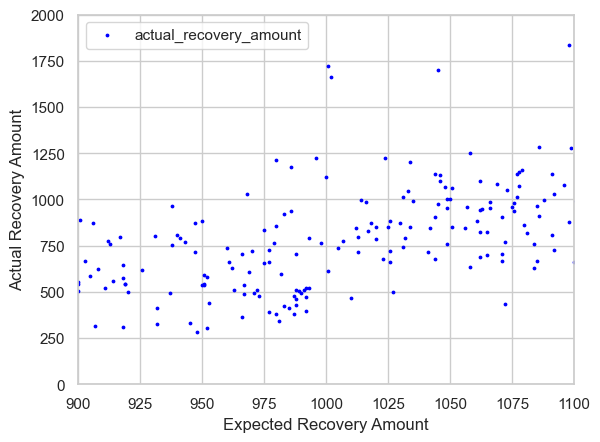

In [17]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount 
plt.scatter(x=data['expected_recovery_amount'], y=data['actual_recovery_amount'], color = 'blue', s= 3, label = 'actual_recovery_amount')
# below range will cover recovery level 0 and 1
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)
plt.show()

Again, we are not seeing any discontinuity around $1000 threshold.

## Statistical analysis: recovery amount

Similar to our analysis of age, we can conduct statistical tests to asceratain if there exists a discontinuity in the actual recovery amount beyond the $1000 threshold. 
We will perform this analysis for two distinct ranges of expected recovery amounts: 900 to 1100 dollars, and a narrower span of 950 to 1050 dollars, in order to verify the consistency of our results.

In [18]:
exp_rec_amt_900_1100.groupby(['recovery_strategy'])['actual_recovery_amount'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery       89.000000
       Level 1 Recovery       94.000000
mean   Level 0 Recovery      623.017022
       Level 1 Recovery      955.825551
std    Level 0 Recovery      211.620859
       Level 1 Recovery      293.732434
min    Level 0 Recovery      282.855000
       Level 1 Recovery      433.199166
25%    Level 0 Recovery      491.425000
       Level 1 Recovery      777.705154
50%    Level 0 Recovery      575.435000
       Level 1 Recovery      907.271525
75%    Level 0 Recovery      762.995000
       Level 1 Recovery     1060.334387
max    Level 0 Recovery     1225.660000
       Level 1 Recovery     2053.290126
dtype: float64

In [19]:
# Perform Kruskal-Wallis test
level_0_actual = exp_rec_amt_900_1100.loc[data['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
level_1_actual = exp_rec_amt_900_1100.loc[data['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(level_0_actual, level_1_actual))

KruskalResult(statistic=65.37966302528878, pvalue=6.17730875280311e-16)


In [20]:
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) & 
                      (data['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
# ... YOUR CODE FOR TASK 6 ...
print(stats.kruskal(Level_0_actual,Level_1_actual))

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


#### Interpretting the above results:
The very small p-value (close to zero) suggests strong evidence against the null hypothesis, this indicates that there are significant differences between the groups being compared. In other words, we have enough evidence to reject the null hypothesis, suggesting that at least one of the groups differs from the others.

### Regression modeling: no threshold

We now take a regression-based approach to estimate the impact of the program at the $1000 threshold using the data that is just above and just below the threshold.

In [21]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = exp_rec_amt_900_1100['expected_recovery_amount']
y = exp_rec_amt_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
mdl = sm.OLS(y, X).fit()
predictions = mdl.predict(X)

# Print out the model summary statistics
# ... YOUR CODE FOR TASK 7 ...
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Tue, 10 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                            11:46:41   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression modeling: adding true threshold
In this case we are adding threshold to the model ($1000)

We will introduce a binary indicator variable (taking values of either 0 or 1) to signify whether the expected recovery amount exceeded $1000. When incorporating the actual threshold into the model, the regression coefficient associated with this true threshold reflects the additional amount recovered as a result of implementing the higher recovery strategy. In essence, this coefficient quantifies the magnitude of the discontinuity observed for customers positioned just above and just below the threshold.

Should the elevated recovery strategy prove more effective in retrieving additional funds, the regression coefficient for the true threshold will be positive. Conversely, if the higher recovery strategy doesn't lead to a statistically significant increase in recovery, the coefficient will not be deemed statistically significant.

In [22]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
data['indicator_1000'] = np.where(data['expected_recovery_amount'] <1000, 0,1)
exp_rec_amt_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & (data['expected_recovery_amount'] >=900)]

#define X and y
X= exp_rec_amt_900_1100[['expected_recovery_amount', 'indicator_1000']]
y = exp_rec_amt_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

#building linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Tue, 10 Oct 2023   Prob (F-statistic):           1.83e-15
Time:                            11:46:41   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression modeling: adjusting the window

The regression coefficient for the actual threshold demonstrated statistical significance, signifying an estimated impact of roughly 278 dollars. This figure significantly surpasses the required investment of 50 dollars per customer to implement the enhanced recovery strategy.

Before presenting these findings to our manager, it's important to ensure that the observed result isn't solely attributed to the chosen range of expected recovery amounts, which was initially set between 900 to 1100 dollars. To validate our findings, we'll conduct a parallel analysis using a narrower range, specifically from 950 to 1050 dollars, and check for consistency in the results.

Regardless of whether we consider a wider range (900 to 1100 dollars) or a more focused range (950 to 1050 dollars), the additional recovery amount attributed to the higher recovery strategy vastly outweighs the 50 dollars per customer cost associated with its implementation. Based on this analysis, we can confidently conclude that the higher recovery strategy justifies the extra expenditure of 50 dollars per customer.

In [23]:
exp_rec_amt_950_1050 = data.loc[(data['expected_recovery_amount'] <1100) &
                                (data['expected_recovery_amount'] >=950)]
# Define X and y

X = exp_rec_amt_950_1050[['expected_recovery_amount', 'indicator_1000']]
y = exp_rec_amt_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# build linear regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.281
Model:                                OLS   Adj. R-squared:                  0.271
Method:                     Least Squares   F-statistic:                     28.48
Date:                    Tue, 10 Oct 2023   Prob (F-statistic):           3.61e-11
Time:                            11:46:41   Log-Likelihood:                -1043.1
No. Observations:                     149   AIC:                             2092.
Df Residuals:                         146   BIC:                             2101.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -468.3862    907.328     -0.516      0.606   -2261.579    1324.807
expected_recovery_amount     1.1125      0.929      1.197      0.233      -0.724       2.949
indicator_1000             255.3020     84.615      3.017      0.003      88.074     422.530
==============================================================================
Omnibus:                       59.402   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.729
Skew:                           1.628   Prob(JB):                     1.25e-35
Kurtosis:                       6.909   Cond. No.                     4.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""